In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

<b><font size="6" color="red">ch11. N차원 배열 다루기</font></b>

# 4절. 복사와 뷰

## 4.1 할당시 복사 안 함

In [2]:
# 스칼라 변수
a = 10
b = 'Hello'
c = 1.2

In [3]:
a1 = a
print('a=',a,'이고 a1=',a1)
print(id(a1), id(a))
a = 90
print('수정후')
print('a=',a,'이고 a1=',a1)
print(id(a1), id(a))

a= 10 이고 a1= 10
140709862058064 140709862058064
수정후
a= 90 이고 a1= 10
140709862058064 140709862060624


In [4]:
# 배열일 경우
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [5]:
a.shape, type(a), a.ndim

((12,), numpy.ndarray, 1)

In [6]:
b = a # a변수 안의 주소가 할당

In [7]:
b is a

True

In [8]:
b == a # 값이 같은지

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [9]:
np.all(b==a) # 전부 True인지 여부

True

In [10]:
b.shape, b.ndim

((12,), 1)

In [11]:
b.shape = (3,4)
b.shape, b.ndim

((3, 4), 2)

In [12]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [13]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
id(a), id(b)

(1538618582240, 1538618582240)

## 4.2 얕은 복사 : 뷰(view)

In [15]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [16]:
c = a.view() # 앝은 복사
c is a

False

In [17]:
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [18]:
np.all(c==a)

True

In [19]:
c.flags.owndata # c가 메모리를 독자적으로 직접 소유하지는 않음

False

In [20]:
a.flags.owndata # a가 메모리를 독자적으로 직접 소유함

False

In [21]:
c.shape, c.ndim

((3, 4), 2)

In [22]:
a.shape, a.ndim

((3, 4), 2)

In [23]:
c.shape = (2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [24]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [25]:
c[:,2] = 999
c

array([[  0,   1, 999,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11]])

In [26]:
a

array([[  0,   1, 999,   3],
       [  4,   5,   6,   7],
       [999,   9,  10,  11]])

In [27]:
# 슬라이싱이 될 때 뷰가 반환됨
a = np.array([[2,1,9,50],
              [7,5,7,80],
              [17,6,7,90]])
x = a[:, :-1] # 슬라싱될 때 뷰가 반환
print(a)
print(x)

[[ 2  1  9 50]
 [ 7  5  7 80]
 [17  6  7 90]]
[[ 2  1  9]
 [ 7  5  7]
 [17  6  7]]


In [28]:
x[:,0] = 99 
a

array([[99,  1,  9, 50],
       [99,  5,  7, 80],
       [99,  6,  7, 90]])

## 4.3 깊은 복사 : copy()

In [29]:
a = np.arange(12).reshape(-1,4)
d = a.copy()
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [30]:
d is a

False

In [31]:
np.all(d == a)

True

In [32]:
a[:,0] = 99
a

array([[99,  1,  2,  3],
       [99,  5,  6,  7],
       [99,  9, 10, 11]])

In [33]:
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [34]:
# 슬라이싱이 될 때 뷰가 반환되므로 copy()이용
a = np.array([[2,1,9,50],
              [7,5,7,80],
              [17,6,7,90]])
x = a[:, :-1].copy()
print(a)
print(x)

[[ 2  1  9 50]
 [ 7  5  7 80]
 [17  6  7 90]]
[[ 2  1  9]
 [ 7  5  7]
 [17  6  7]]


In [35]:
x[0] = [999,999,999]
x

array([[999, 999, 999],
       [  7,   5,   7],
       [ 17,   6,   7]])

In [36]:
a

array([[ 2,  1,  9, 50],
       [ 7,  5,  7, 80],
       [17,  6,  7, 90]])

# 5절 고급인덱싱

## 5.1 인덱스 배열로 인덱싱

In [37]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121],
      dtype=int32)

In [38]:
i = np.array([1,1,3,8,5])

In [39]:
a[i]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [40]:
j= np.array([[3,4],
             [9,7]])

In [41]:
a[j]

array([[ 9, 16],
       [81, 49]], dtype=int32)

### 

In [42]:
                   # R G B
palette = np.array([[0,0,0], # black
                    [255,0,0], # red
                    [0, 255, 0], # green
                    [0,0,255],  #blue
                    [255,255,255] # white
                   ])

In [43]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data = palette[image_index]
image_data.shape, image_data

((10, 10, 3),
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [  0,   0,   0],
         [  0,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [  0,   0,   0],
         [  0,   0,   0],
         [255, 255, 255]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [255,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [  0,   0, 255],
         [255, 

In [44]:
# %matplotlib inline 예전 버전의 주피터노트북에서 실행한 브라우저에 시각화를 바로 볼 수 있게 

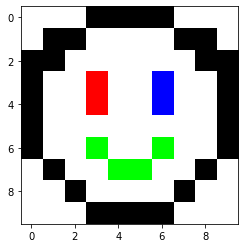

In [45]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(image_data, interpolation='nearest')
plt.show()

In [46]:
# 아나콘다 프롬프트에서 tensorflow 패키지 install

In [47]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [48]:
import tensorflow.keras.datasets.mnist as mnist
mnist = mnist.load_data()
mnist[0][0].shape # 독립변수(학습셋 = 훈련셋)

(60000, 28, 28)

In [49]:
mnist[0][1].shape # 종속변수(학습셋 = 훈련셋)

(60000,)

In [50]:
mnist[0][1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [51]:
mnist[1][0].shape # 독립변수 (테스트셋)

(10000, 28, 28)

In [52]:
mnist[1][1].shape # 종속변수(테스트셋)

(10000,)

In [53]:
X = mnist[0][0]
Y = mnist[0][1]

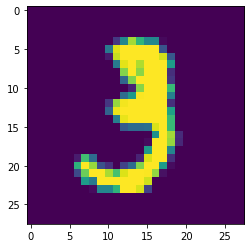

In [54]:
import matplotlib.pyplot as plt
plt.imshow(X[10])
plt.show()

In [55]:
Y[10]

3

## 5.2 다차원인덱싱

In [56]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [57]:
i = np.array([[0,1],
              [1,2]]) #행
j = np.array([[2,1],
              [3,3]]) # 열
a[i, j]

array([[ 2,  5],
       [ 7, 11]])

In [58]:
i = np.array([0,1])
j = np.array([2,3])
a[i, j]

array([2, 7])

## 5.3 argmax :  최댓값이 있는 곳의 인덱스

In [59]:
import numpy as np
data=np.sin(np.arange(20).reshape(5,4))
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [60]:
ind = data.argmax(axis=0) # 각 열별 큰 값이 있는 index
ind

array([2, 0, 3, 1], dtype=int64)

In [61]:
# 0열에서 최대값, 1열에서 최대값
data[ind[0], 0], data[ind[1],1]

(0.9893582466233818, 0.8414709848078965)

In [62]:
data.shape

(5, 4)

In [63]:
# data_col_max = data[ind, range(4)]
data_col_max = data[ind, range(data.shape[1])]
data_col_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [64]:
for i, item in enumerate(data_col_max):
    print("{}열의 최대값은 {}".format(i, item))

0열의 최대값은 0.9893582466233818
1열의 최대값은 0.8414709848078965
2열의 최대값은 0.9906073556948704
3열의 최대값은 0.6569865987187891


In [65]:
np.all(data.max(axis=0) == data_col_max)

True

In [66]:
# 행별 최대값을 출력하기
#   (argmat함수를 이용한 최대값 출력, np.all을 이용하여 max()결과와 비교)

In [67]:
ind = data.argmax(axis=1)
ind

array([2, 3, 0, 2, 3], dtype=int64)

In [68]:
data_row_max = data[range(data.shape[0]), ind]
data_row_max

array([0.90929743, 0.6569866 , 0.98935825, 0.99060736, 0.14987721])

In [69]:
np.all(data_row_max == data.max(axis=1))

True

## 5.4 인덱싱을 이용한 값 변경

In [70]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [71]:
a[::2] = 99
a

array([99,  1, 99,  3, 99])

## 5.5 논리 배열을 이용한 인덱싱

In [72]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [73]:
b = a%2==0
b

array([[ True, False,  True, False,  True, False,  True, False,  True,
        False],
       [ True, False,  True, False,  True, False,  True, False,  True,
        False]])

In [74]:
a[b]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [75]:
a[a%3==0]

array([ 0,  3,  6,  9, 12, 15, 18])

# 6절 선형대수
- 2차원 넘파이 배열을 행렬
    - 행렬곱 : @ 또는 np.dot()
    - 역행렬 : np.linalg.inv(x)
    - 전치행렬 : x.T, x.transpose()
    - 단위행렬 : np.eye(n) :  n행n열 단위행렬
    - 연립방법식 해 풀기 : np.linalg.inv(x, y) 단, x가 정방행렬만 가능

## 6.1  선형 연립 방정식 풀기(회귀도출) : 독립변수2개, 데이터2개

In [76]:
# a의 역행렬 @ a 는 단위행렬
a = np.array([[1,2], [3,4]])
np.linalg.inv(a) @ a

array([[1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00]])

In [77]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [78]:
np.all(np.eye(2) @ a == a )

True

In [79]:
a.T

array([[1, 3],
       [2, 4]])

In [80]:
a = np.array([[2,2,2],[3,3,3]])
a

array([[2, 2, 2],
       [3, 3, 3]])

In [81]:
a.T @ a # 정방행렬을 만들고자 할 때 전치행렬이용

array([[13, 13, 13],
       [13, 13, 13],
       [13, 13, 13]])

**독립변수 2개, 데이터 2개**

In [82]:
x = np.array([[1, 2],
              [3, 4]]) # 독립변수

In [83]:
y = np.array([[5],
              [7]]) # 종속변수 

<pre>
<b>
x @ W = y
x의 역행렬 @ x @ W = x의 역행렬 @ y
W = x의 역행렬 @ y
</b>

In [84]:
W = np.linalg.inv(x) @ y
W

array([[-3.],
       [ 4.]])

In [85]:
# 독립변수 2,3일 경우 종속변수는 ?
2 * W[0] + 3 * W[1]

array([6.])

## 6.2 선형 연립방정식(회귀도출)과 그래프 : 독립변수1

**정방행렬을 위해 데이터2**

In [86]:
x = [2,3]
y = [6.8, 7.3]

In [87]:
np.ones(len(x))

array([1., 1.])

In [88]:
# 2 1
# 3 1
X = np.column_stack((x, np.ones(len(x)))) #독립변수

In [89]:
Y = np.array(y).reshape(2,1)
Y

array([[6.8],
       [7.3]])

**X @ W = Y** <br>
**X의 역행렬 @ X @ W = X의 역행렬 @ Y** <br>
**W = X의 역행렬 @ Y** <br>

In [90]:
W = np.linalg.inv(X) @ Y
W

array([[0.5],
       [5.8]])

In [91]:
f = X[:, 0]*W[0] + W[1]
f

array([6.8, 7.3])

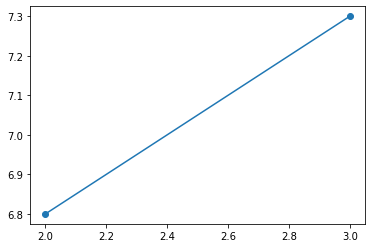

In [92]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x, f, '-')
plt.show()

**데이터를 n개**

In [93]:
x = [32, 64, 96, 118, 126, 144, 152.5, 158] #독립변수
y = [18, 24, 61.5,49, 52, 105,  130.3, 125] #독립변수

In [94]:
X = np.column_stack( (x, np.ones(len(x))) )
print(X) # 독립변수 행렬
Y = np.array(y).reshape(len(y),1)
print(Y) # 종속변수 행렬

[[ 32.    1. ]
 [ 64.    1. ]
 [ 96.    1. ]
 [118.    1. ]
 [126.    1. ]
 [144.    1. ]
 [152.5   1. ]
 [158.    1. ]]
[[ 18. ]
 [ 24. ]
 [ 61.5]
 [ 49. ]
 [ 52. ]
 [105. ]
 [130.3]
 [125. ]]


**X @ W = Y** <br>
**X.T @ X @ W = X.T @ Y**<br>
**(X.T @ X)의 역행렬 @ (X.T @ X) @ W = (X.T @ X)의 역행렬 @ X.T @ Y**<br>
**W = (X.T @ X)의 역행렬 @ X.T @ Y**<br>

In [95]:
W = np.linalg.inv(X.T @ X) @ X.T @ Y
W

array([[  0.87493126],
       [-26.79078617]])

In [96]:
f = X[:, 0]*W[0] + W[1] # 예측치

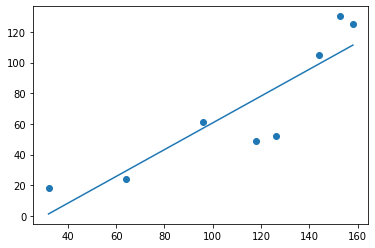

In [97]:
plt.scatter(x, y)
plt.plot(X[:,0], f, '-')
plt.show()

# 7절. 연습문제

## 7.1 실습형

In [98]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
print(iris.data) #독립변수
print(iris.target) # 종속변수

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [99]:
iris_data = iris.data # 독립변수

In [ ]:
iris.target # 종속변수

In [ ]:
iris.target_names[iris.target]

In [100]:
# 실습형1. 각 변수별 평균을 출력하세요
np.mean(iris_data, axis=0) # 열별 평균
iris_data.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [101]:
# 실습형2. 처음 다섯개 행출력
iris_data[:5] #iris_data[:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [102]:
# 실습형3. 처음 다섯개 행에서 마지막 열을 제외한 나머지 열을 출력
ex3 = iris_data[:5, :-1]
ex3

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [103]:
# 실습형 4. 처음 다섯개 행에서 마지막 열만 출력
ex4 = iris_data[:5,-1]
ex4

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [104]:
# 실습형 5. 3번 배열과 4번 배열을 원래의 모양으로 합치면 (아래의 세 명령어가 같은 결과)
np.c_[ex3,ex4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [105]:
np.column_stack((ex3, ex4))

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [106]:
np.hstack((ex3, ex4[:, np.newaxis]))

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [107]:
# 실습형6. 처음 다섯 개 행을 이용해서 각 열 별로 평균보다 큰 값들만 출력
iris_sample = iris_data[:5]
iris_sample[iris_sample>np.mean(iris_sample, axis = 0)]

array([5.1, 3.5, 4.9, 1.5, 5. , 3.6])

In [108]:
iris_sample

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [109]:
np.mean(iris_sample, axis = 0) # 각 열 별로 평균

array([4.86, 3.28, 1.4 , 0.2 ])

## 8.2 문제풀이형

In [110]:
#서술형1. (3)
import numpy as np
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [111]:
print(a.sum())

66


In [112]:
print(a.sum(0)) #print(a.sum(axis=0)) 행을 빼고 열끼리 합

[12 15 18 21]


In [113]:
# 서술형2. (4)
import numpy as np
a = np.floor(10*np.random.random((3,4)))
a

array([[0., 8., 3., 0.],
       [8., 9., 4., 9.],
       [8., 3., 8., 6.]])

In [114]:
a.ravel() # 1차원 배열로 평평하게 펴주는 ravel() flatten()

array([0., 8., 3., 0., 8., 9., 4., 9., 8., 3., 8., 6.])

In [115]:
a.reshape(6,2)

array([[0., 8.],
       [3., 0.],
       [8., 9.],
       [4., 9.],
       [8., 3.],
       [8., 6.]])

In [116]:
a.resize(2,6)
a

array([[0., 8., 3., 0., 8., 9.],
       [4., 9., 8., 3., 8., 6.]])

In [117]:
a.T

array([[0., 4.],
       [8., 9.],
       [3., 8.],
       [0., 3.],
       [8., 8.],
       [9., 6.]])

In [119]:
# 서술형3. (1)
import numpy as np
a = np.arange(12).reshape(3,4)
a[:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [120]:
# 서술형 4. (2)
import numpy as np
a = np.array([1,2,3,4,5])
a[[1,3,4]] = 0
a

array([1, 0, 3, 0, 0])

In [121]:
# 서술형5. (2)
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
np.c_[a,b]

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [122]:
# 위의 작업과 같은 결과를 수행하는 stack 함수들
np.dstack((a,b))

array([[[ 1,  6],
        [ 2,  7],
        [ 3,  8],
        [ 4,  9],
        [ 5, 10]]])

In [123]:
np.column_stack((a, b))

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [124]:
np.hstack((a[:, np.newaxis], b[:, np.newaxis]))

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [125]:
np.stack((a,b), axis=1)

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])